<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
plt.style.use('ggplot')

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [29]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
df = pd.read_csv(house_csv)

In [19]:
# head
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [20]:
# tail
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [21]:
# check null values
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [30]:
# data types
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [31]:
# zip code is categorical value, change to string

df_zipstr=df.astype({'zip':str})
df_zipstr.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [37]:
# covert sale_date to datetime datatype
df_zipstr['sale_date'] = pd.to_datetime(df_zipstr['sale_date'])
df_zipstr.dtypes

street               object
city                 object
zip                  object
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
latitude            float64
longitude           float64
dtype: object

In [103]:
# extract day from sale_date and save in a new column
day_datetime = df_zipstr.sale_date.dt.day
df_zipstr['day'] = day_datetime

0      21
1      21
2      21
3      21
4      21
       ..
980    15
981    15
982    15
983    15
984    15
Name: day, Length: 985, dtype: int64

In [39]:
# describe data
df_zipstr.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


Text(0, 0.5, 'City')

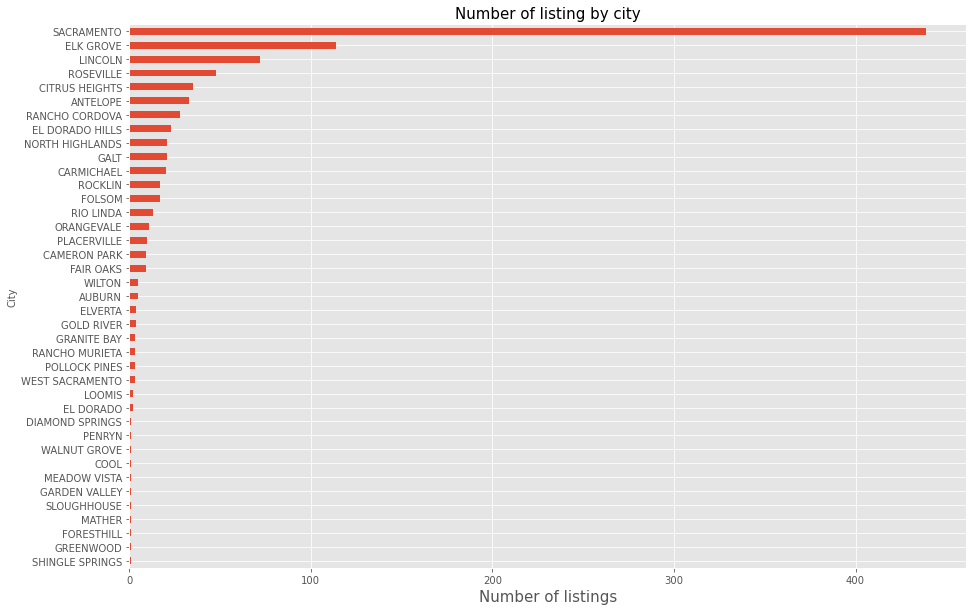

In [53]:
# bar plot of 'city'
df_city_groupby = df_zipstr.groupby('city')['city'].count()
plt.figure(figsize=(15,10))
sorted_city_groupby = df_city_groupby.sort_values()
sorted_city_groupby.plot.barh()
plt.title('Number of listing by city',fontsize = 15)
plt.xlabel('Number of listings',fontsize=15)
plt.ylabel('City',fontsize = 10)

In [179]:
# create a new 'type' ('Plot') which have 0 beds

no_beds = df_zipstr[df_zipstr.beds == 0]
indicies = no_beds.type.index
df_zipstr.iloc[indicies,7] = 'Plot'
df_zipstr.type.value_counts()

Residential     818
Plot            108
Condo            46
Multi-Family     13
Name: type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Residential'),
  Text(1, 0, 'Plot'),
  Text(2, 0, 'Condo'),
  Text(3, 0, 'Multi-Family')])

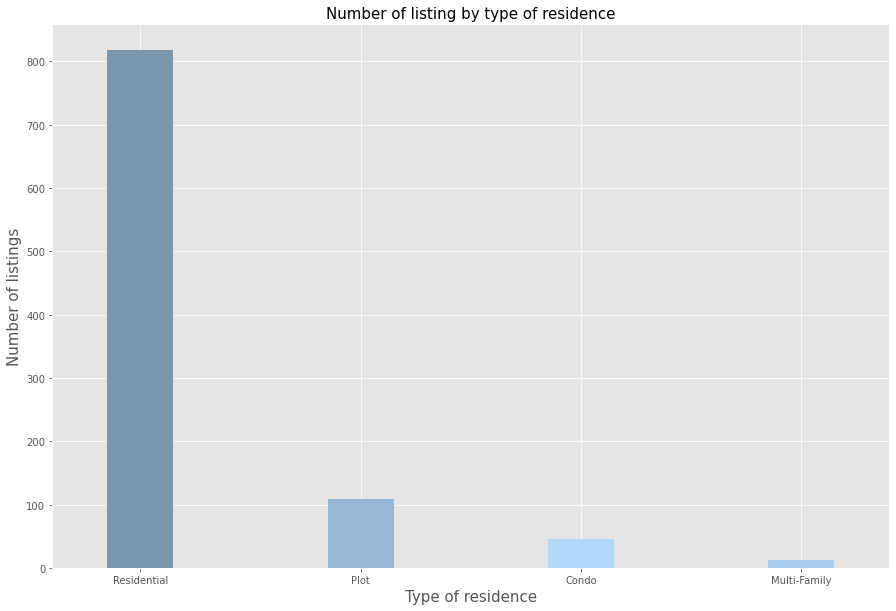

In [177]:
# bar plot 'type' of residence
df_residence_groupby = df_zipstr.groupby('type')['type'].count()
sorted_df_residence_groupby = df_residence_groupby.sort_values(ascending=False)
plt.figure(figsize=(15,10))
color = ['#7B96AD', '#96B7D4', '#B1D8FA', '#A9CEEE']
sorted_df_residence_groupby.plot.bar(color=color,width=0.3)
plt.title('Number of listing by type of residence',fontsize = 15)
plt.xlabel('Type of residence',fontsize=15)
plt.ylabel('Number of listings',fontsize = 15)
plt.xticks(rotation=0)

In [180]:
# Bonus : use folium library to create a base map of Sacramento 
# and add circle/marker for residence locations
def generateBaseMap(default_location=[38.58, -121.49], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map
m = generateBaseMap()

In [181]:
m = generateBaseMap()
df_residential = df_zipstr[df_zipstr.type=='Residential']
for index,row in df_residence.iterrows():
    x,y = row[10],row[11]
    folium.Circle(radius=100,location=[x,y]).add_to(m)
m

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?
Target variable is `sq__ft` as it is a continous variable.

In [130]:
# ANSWER
df_ml = df_zipstr
df_test = df_ml[df_ml.sq__ft==0]
index_0_sqft = df_ml[df_ml.sq__ft==0].index
dropped_df = df_ml.drop(index_0_sqft)

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [131]:
# ANSWER
df_ml.corr()

,beds,baths,sq__ft,price,latitude,longitude,day
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.003317
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,0.027585
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,0.052710
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.050196
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,-0.043809
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,-0.004985
day,-0.003317,0.027585,0.052710,0.050196,-0.043809,-0.004985,1.000000


#### 2.3 Find correlation between variables

Find correlation between variables. Create scatter plots of potential variables.  Which is the best predictor? Why? State your reason.

In [132]:
# ANSWER
print(dropped_df.corr())
df_ml.corr()

               beds     baths    sq__ft     price  latitude  longitude  \
beds       1.000000  0.654746  0.695710  0.441988 -0.107440   0.056713   
baths      0.654746  1.000000  0.724631  0.501820 -0.081249   0.108081   
sq__ft     0.695710  0.724631  1.000000  0.693708 -0.103287   0.135809   
price      0.441988  0.501820  0.693708  1.000000  0.058475   0.278312   
latitude  -0.107440 -0.081249 -0.103287  0.058475  1.000000   0.344431   
longitude  0.056713  0.108081  0.135809  0.278312  0.344431   1.000000   
day        0.047372  0.090159  0.091621  0.106157 -0.055539   0.031488   

                day  
beds       0.047372  
baths      0.090159  
sq__ft     0.091621  
price      0.106157  
latitude  -0.055539  
longitude  0.031488  
day        1.000000  


,beds,baths,sq__ft,price,latitude,longitude,day
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.003317
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,0.027585
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,0.052710
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.050196
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,-0.043809
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,-0.004985
day,-0.003317,0.027585,0.052710,0.050196,-0.043809,-0.004985,1.000000


Try to use `beds`, `baths` and `sq__ft` to predict price

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [112]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [266]:
# ANSWER
linear_regression = LinearRegression()

X = df_ml[['sq__ft','beds','baths']]
y = df_ml['price']
linear_regression.fit(X,y)

LinearRegression()


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [267]:
# ANSWER
linear_regression.score(X,y)

0.18055988065088857

### 3. Splitting Data

In [264]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [265]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [191]:
# ANSWER
X_train.shape,X_test.shape

((659, 3), (326, 3))

In [192]:
y_train.shape,y_train.shape

((659,), (659,))

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [269]:
# ANSWER
regr.fit(X_train,y_train)
regr.score(X_test, y_test)

0.1690311653159038

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [271]:
# ANSWER
beds=3
baths=2
sq__ft = 1204
prediction = [sq__ft,beds,baths]
regr.predict([prediction])

array([241221.89856559])

#### Find the error

In [242]:
# Predict price from X_test
predicted = regr.predict(X_test)
yi_minus_yhat_squared = (y_test - predicted)**2
mse = 1/len(predicted) * yi_minus_yhat_squared.sum()
mse

18227689331.573532

In [238]:
def fit_regr_model(df,predictor,target='price',split_test=False,test_size=0.33,random_state=42):
    X = df[predictor].values.reshape(-1, 1)
    y = df[target].astype(int)
    func_regr = LinearRegression()
    if split_test == True:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        func_regr.fit(X_train,y_train)
        return func_regr, X_test, y_test
    else:      
        func_regr.fit(X,y)
        return func_regr,X,y

def calculate_mse(model,X,y):
    predicted = model.predict(X)
    yi_minus_yhat_squared = (y - predicted)**2
    mse = 1/len(predicted) * yi_minus_yhat_squared.sum()
    return mse    

In [236]:
dropped_regr,dropped_x_test,dropped_y_test = fit_regr_model(dropped_df,'sq__ft',target='price',split_test=True)

print(calculate_mse(dropped_regr,dropped_x_test,dropped_y_test))
dropped_regr.predict([[1204]])

6873464361.755376


array([182611.9071335])

In [250]:
func_regr_1, X1,y1 = fit_regr_model(dropped_df,'sq__ft',target='price',split_test=False)
calculate_mse(func_regr_1,X1,y1)

7439426337.103196

In [241]:
from sklearn.metrics import mean_squared_error

In [251]:
mean_squared_error(y_test,predicted) == mse

True



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



